In [151]:
import rasterio
import numpy as np
from rasterio.enums import Resampling
import matplotlib.pyplot as plt
from skimage.transform import resize as sk_resize

In [152]:
pip install scikit-image


Note: you may need to restart the kernel to use updated packages.


In [153]:
with rasterio.open(r'C:\Users\febin\Downloads\S2A_MSIL1C_20241010T102941_N0511_R108_T32TLP_20241010T141139.SAFE\GRANULE\L1C_T32TLP_A048582_20241010T103402\IMG_DATA\T32TLP_20241010T102941_B04.jp2') as src:
    red=src.read(1)
    bounds=src.bounds
    width=src.width
    height=src.height
    transform=src.transform
    
with rasterio.open(r'C:\Users\febin\Downloads\S2A_MSIL1C_20241010T102941_N0511_R108_T32TLP_20241010T141139.SAFE\GRANULE\L1C_T32TLP_A048582_20241010T103402\IMG_DATA\T32TLP_20241010T102941_B03.jp2') as src:
    blue=src.read(1)
with rasterio.open(r'C:\Users\febin\Downloads\S2A_MSIL1C_20241010T102941_N0511_R108_T32TLP_20241010T141139.SAFE\GRANULE\L1C_T32TLP_A048582_20241010T103402\IMG_DATA\T32TLP_20241010T102941_B02.jp2') as src:
    green=src.read(1)


In [154]:
print(transform)
#print(bounds)
red=red/10000

blue=blue/10000
green=green/10000

| 10.00, 0.00, 300000.00|
| 0.00,-10.00, 4900020.00|
| 0.00, 0.00, 1.00|


In [155]:
img=np.dstack((red,green,blue))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.8].


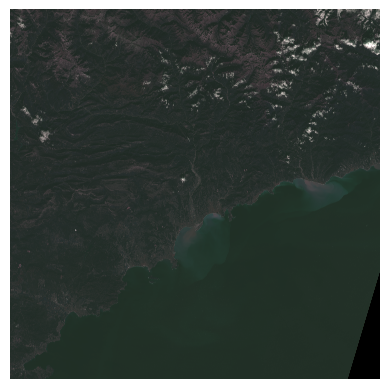

In [156]:
plt.imshow(img)
plt.axis('off')
plt.show()


In [157]:
left,bottom,right,top=bounds
gsd_x=(right-left)/width
print(gsd_x)

10.0


In [158]:
gsd_y=(top-bottom)/height
print(gsd_y)

10.0


In [178]:
crop_red=red[100:200,150:250]
crop_green=green[100:200,150:250]
crop_blue=blue[100:200,150:250]

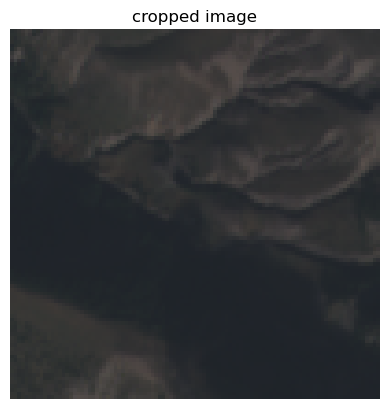

In [180]:
image=np.dstack((crop_red,crop_blue,crop_green))
plt.imshow(image)
plt.title("cropped image")
plt.axis("off")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.7304564].


<function matplotlib.pyplot.show(close=None, block=None)>

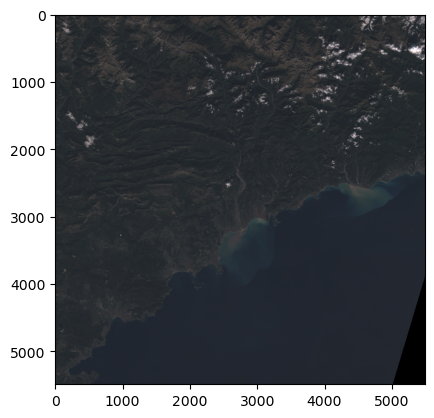

In [161]:
def resize(image,scale):
    new_height=image.shape[0]*scale
    new_width=image.shape[1]*scale
    
    resized = sk_resize(
        image,
        (new_height, new_width),
        order=1
        ,preserve_range=True
    )
    return resized.astype(np.float32)
new_red=resize(red,0.5)
new_blue=resize(blue,0.5)
new_green=resize(green,0.5)
final_image=np.dstack((new_red,new_blue,new_green))
plt.imshow(final_image)
plt.show